# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from scipy.stats import shapiro, t, norm

In [2]:
#we take only a sample of the dataset to speed up computations
df = pd.read_csv("US_Accidents_Dec19_sample.csv")

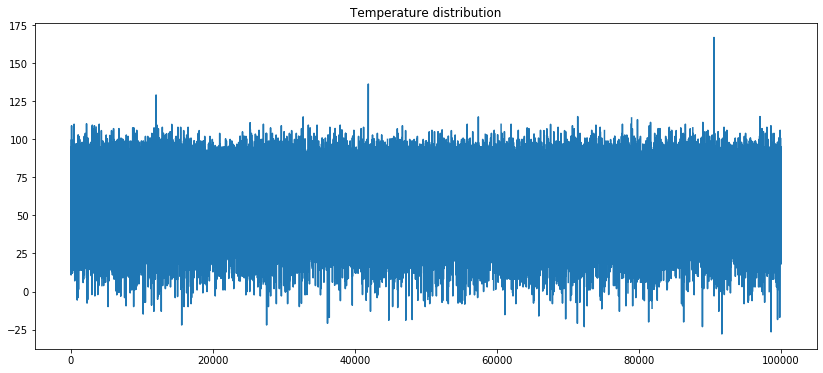

In [3]:
plt.figure(figsize=(14,6))
plt.title("Temperature distribution")
plt.plot(df["Temperature(F)"].values)
plt.show()

# Digression on the Z-test and Normal Distribution

A Z-test is any statistical test for which the distribution of the test statistic under the null hypothesis can be approximated by a normal distribution. Z-test tests the mean of a distribution in which we already know the population variance.

This is how you can build a standard normal table in Python

In [137]:
# taken from 
# https://github.com/mGalarnyk/Python_Tutorials/blob/master/Statistics/standard_normal_table/standard_normal_table.ipynb

from scipy.integrate import quad
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

standard_normal_table = pd.DataFrame(data = [],
                                     index = np.round(np.arange(0, 3.5, .1),2),
                                     columns = np.round(np.arange(0.00, .1, .01), 2))

for index in standard_normal_table.index:
    for column in standard_normal_table.columns:
        z = np.round(index + column, 2)
        value, _ = quad(normalProbabilityDensity, np.NINF, z)
        standard_normal_table.loc[index, column] = value

standard_normal_table.index = standard_normal_table.index.astype(str)
standard_normal_table.columns = [str(column).ljust(4,'0') for column in standard_normal_table.columns]

In [138]:
standard_normal_table

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.0,0.5,0.503989,0.507978,0.511966,0.515953,0.519939,0.523922,0.527903,0.531881,0.535856
0.1,0.539828,0.543795,0.547758,0.551717,0.55567,0.559618,0.563559,0.567495,0.571424,0.575345
0.2,0.57926,0.583166,0.587064,0.590954,0.594835,0.598706,0.602568,0.60642,0.610261,0.614092
0.3,0.617911,0.62172,0.625516,0.6293,0.633072,0.636831,0.640576,0.644309,0.648027,0.651732
0.4,0.655422,0.659097,0.662757,0.666402,0.670031,0.673645,0.677242,0.680822,0.684386,0.687933
0.5,0.691462,0.694974,0.698468,0.701944,0.705401,0.70884,0.71226,0.715661,0.719043,0.722405
0.6,0.725747,0.729069,0.732371,0.735653,0.738914,0.742154,0.745373,0.748571,0.751748,0.754903
0.7,0.758036,0.761148,0.764238,0.767305,0.77035,0.773373,0.776373,0.77935,0.782305,0.785236
0.8,0.788145,0.79103,0.793892,0.796731,0.799546,0.802337,0.805105,0.80785,0.81057,0.813267
0.9,0.81594,0.818589,0.821214,0.823814,0.826391,0.828944,0.831472,0.833977,0.836457,0.838913


This function plots the PDF of the Gaussian distribution, highlighting the area under the curve corresponding to the input.

In [177]:
def plot_area_prob(probability, mu=0, sigma=1):
    
    plt.figure(figsize=(16,5))
    plt.title(f"Normal distribution with mean={round(mu,4)} and std_dev={round(sigma,4)}")
    
    x = np.arange(mu-5*sigma, mu+5*sigma, 0.001)
        
    z = norm.ppf(probability, loc=mu, scale=sigma) 
    
    print(f"Quantile: {round(z,5)}")
        
    cond = x<z
    
    plt.fill_between(x, norm.pdf(x, mu, sigma), where=~cond, 
                     label=f"{round(1-probability,4)}")
    plt.fill_between(x, norm.pdf(x, mu, sigma), where=cond, 
                     label=f"{round(probability,4)}")
    
    plt.legend(title="AUC")
    
    plt.xticks([mu-5*sigma, mu-4*sigma, mu-3*sigma, mu-2*sigma, mu-sigma, mu, mu+sigma, mu+2*sigma,
                mu+3*sigma, mu+4*sigma, mu+5*sigma])
    
    plt.show()

Quantile: 1.64485


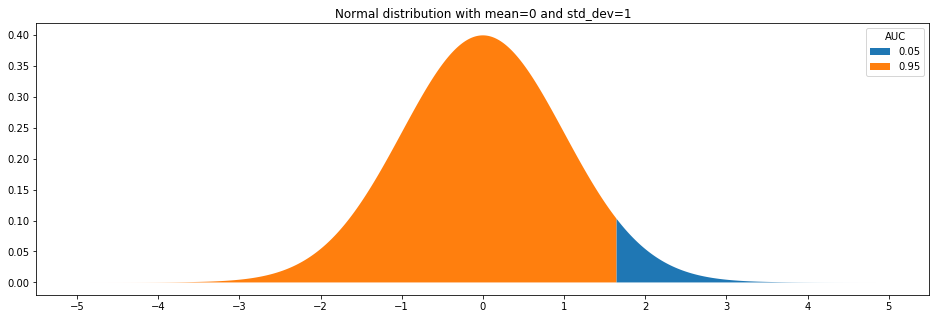

In [178]:
plot_area_prob(0.95)

This function plots the normal distribution, highlighting the area under the curve from -inf to the input quantile, and displays the corresponding value of this area.

In [202]:
def plot_quantile(quantile, mu=0, sigma=1):
    
    plt.figure(figsize=(16,5))
    plt.title(f"Normal distribution with mean={round(mu,4)} and std_dev={round(sigma,4)}")
    
    x = np.arange(mu-5*sigma, mu+5*sigma, 0.001)
        
    z = norm.cdf(quantile, loc=mu, scale=sigma) 
    
    print(f"Probability <= input: {round(z,5)}")
        
    cond = x<quantile
    
    plt.fill_between(x, norm.pdf(x, mu, sigma), where=~cond, 
                     label=f"{round(1-z,5)}")
    plt.fill_between(x, norm.pdf(x, mu, sigma), where=cond, 
                     label=f"{round(z,5)}")
    
    plt.legend(title="AUC")
    
    plt.xticks([mu-5*sigma, mu-4*sigma, mu-3*sigma, mu-2*sigma, mu-sigma, mu, mu+sigma, mu+2*sigma,
                mu+3*sigma, mu+4*sigma, mu+5*sigma])
    
    plt.show()

Probability <= input: 0.97725


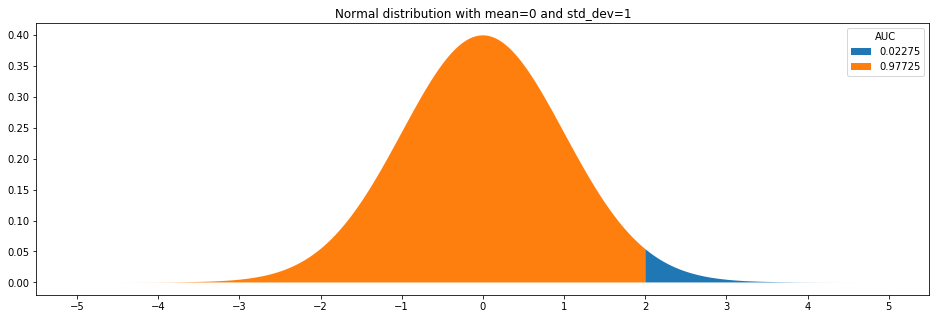

In [203]:
plot_quantile(2)

This function plots the normal distribution with a specified mean and standard deviation. It also highlights the regions of rejection of a two-sided Z-test.

In [99]:
def plot_norm(confidence, mu=0, sigma=1):
    
    plt.figure(figsize=(16,5))
    plt.title(f"Normal distribution with mean={round(mu,4)} and std_dev={round(sigma,4)}")
    
    alpha = 1 - confidence

    x = np.arange(mu-5*sigma, mu+5*sigma, 0.001)
        
    z_alpha2 = norm.ppf(alpha/2, loc=mu, scale=sigma) 
        
    cond = (x<z_alpha2) | (x>2*mu - z_alpha2)
    
    plt.fill_between(x, norm.pdf(x, mu, sigma), where=~cond, 
                     label=f"{round(confidence,4)}")
    plt.fill_between(x, norm.pdf(x, mu, sigma), where=cond, 
                     label=f"{round(alpha,4)}")
    
    plt.legend(title="AUC")
    
    plt.xticks([mu-5*sigma, mu-4*sigma, mu-3*sigma, mu-2*sigma, mu-sigma, mu, mu+sigma, mu+2*sigma,
                mu+3*sigma, mu+4*sigma, mu+5*sigma])
    
    plt.show()

In [228]:
#plot_norm(0.99, mu=23, sigma=4)

This function computes the confidence intervals of a sample mean obtained performing a t-test and a Z-test.

In [133]:
def mean_confidence_int(sample_size, col_name, confidence=0.95):
    
    column = df[col_name]
    
    sample = column.sample(sample_size, replace=False)
    
    m = sample.mean()
    
    s = sample.std()/np.sqrt(sample_size)
    
    h = s * t.ppf((1 + confidence) / 2, sample_size - 1)
    h2 = s * norm.ppf((1 + confidence) / 2)
    
    print(f"t-confidence_interval: [{round(m-h,4)}, {round(m+h,4)}]")
    print(f"z-confidence_interval: [{round(m-h2,4)}, {round(m+h2,4)}]")
        
    plot_norm(confidence, mu=m, sigma=s)  

t-confidence_interval: [57.2302, 64.9274]
z-confidence_interval: [57.2773, 64.8803]


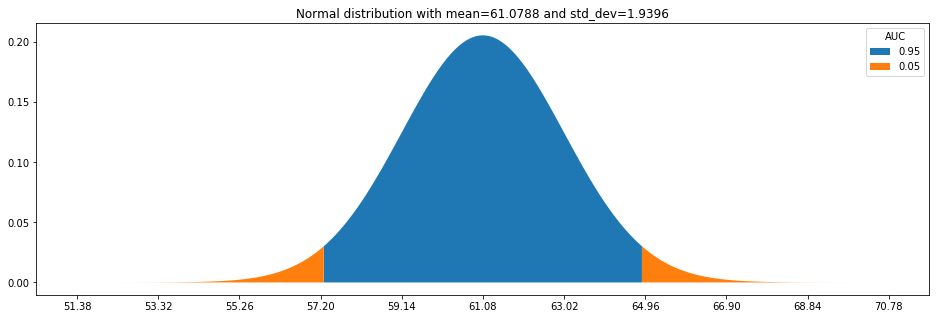

In [224]:
mean_confidence_int(sample_size=100, col_name="Temperature(F)", confidence=0.95)

# Central Limit Theorem

This function extracts the mean of a sample of fixed size for a desired number of times.

In [104]:
def extract_mean(iterations, sample_size, col_name, plot=False):
    
    means = []
    column = df[col_name]
    
    for i in range(iterations):
        
        sample = column.sample(sample_size, replace=False)
    
        means.append(sample.mean())
        
    if plot == True:
#         stat, p = shapiro(means)
#         print('Statistics={}, p={}'.format(stat, p))
#         alpha = 0.05
#         if p > alpha:
#             print('Sample looks Normal (do not reject H0)')
#         else:
#             print('Sample does not look Normal (reject H0)')


        plt.figure(figsize=(14,6))
        plt.title(f"Sample mean distribution, {iterations} extractions, each" 
                  f" with sample size = {sample_size}")
        sns.distplot(means, hist=True, kde=True, bins=30, color = 'darkblue', 
                     hist_kws={'edgecolor':'black'},
                     kde_kws={'linewidth': 4})

        plt.axvline(np.mean(means), color="red", label="distribution mean")
        plt.axvline(column.mean(), color="green", label="population mean")
        plt.legend()
        plt.show()
    
    return np.mean(means), np.std(means, ddof=0)

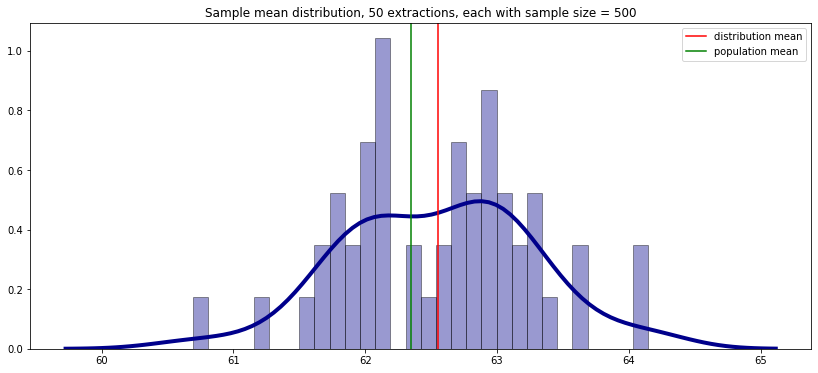

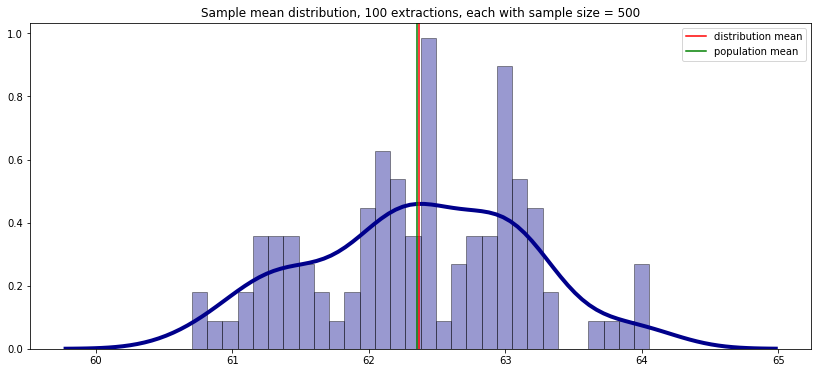

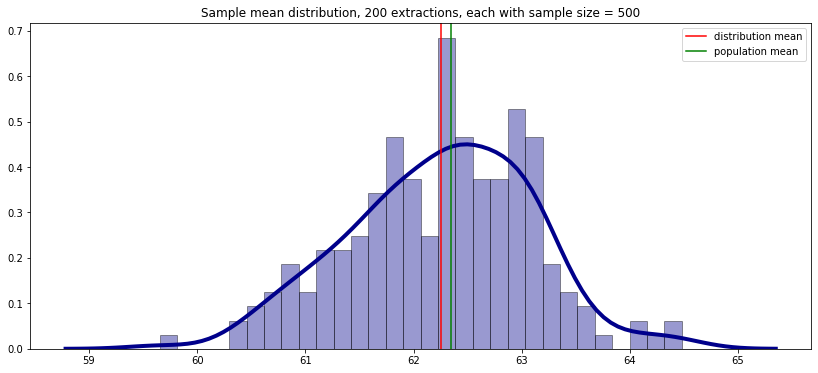

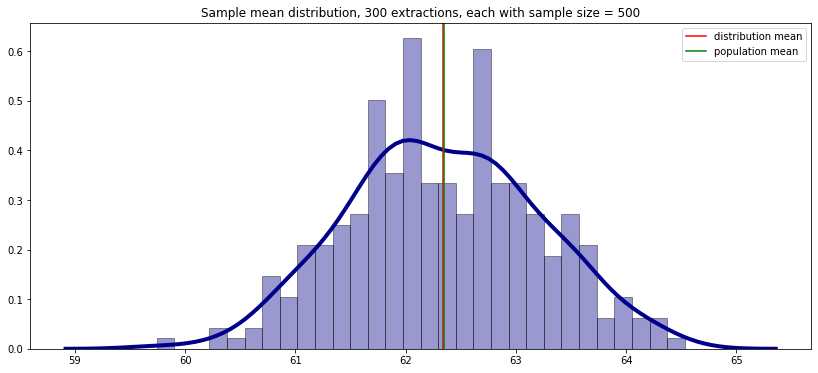

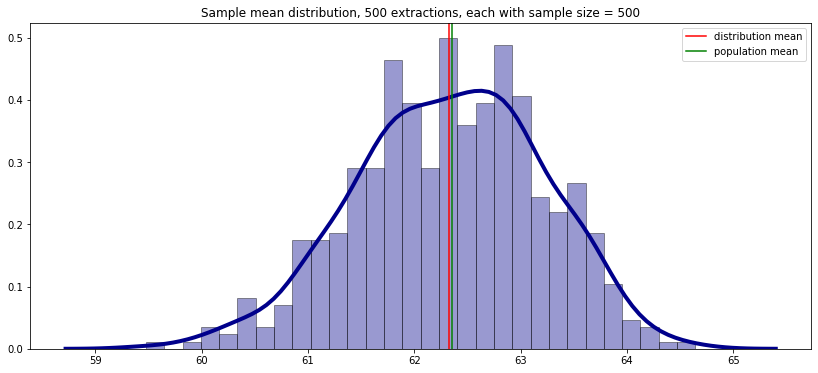

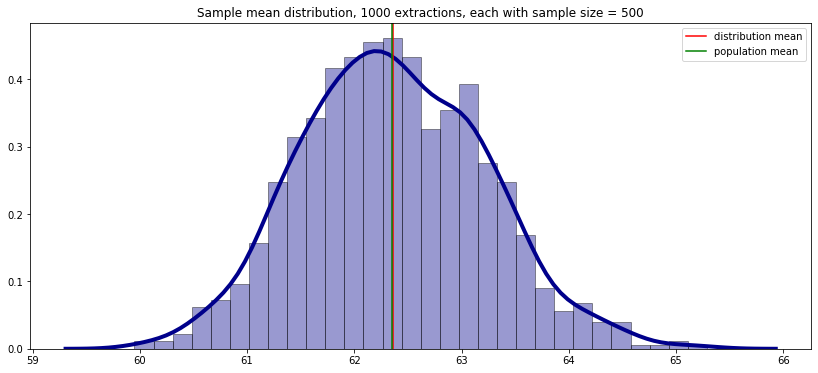

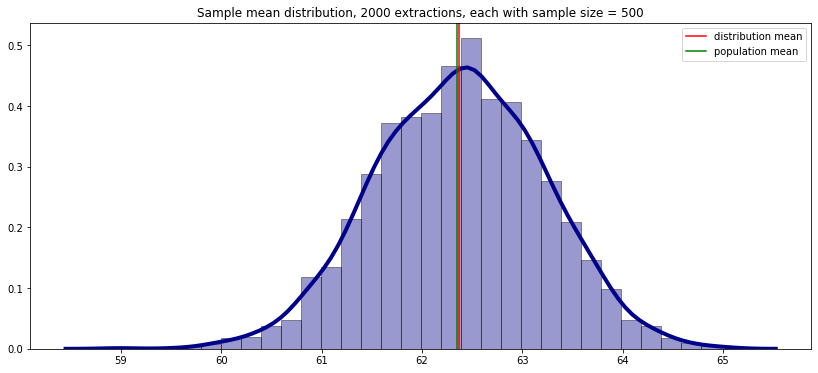

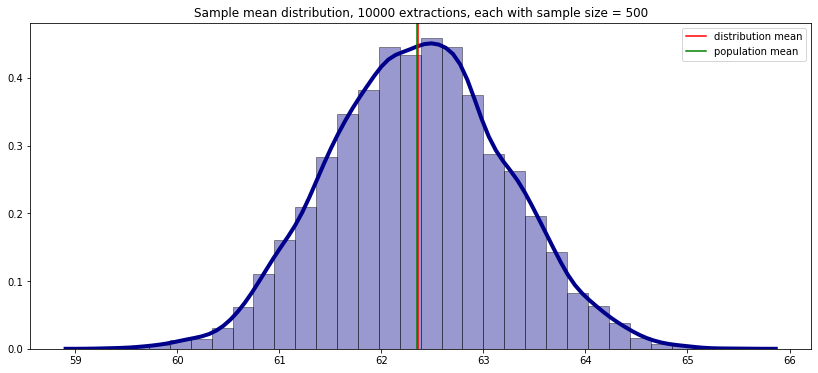

In [105]:
for i in [50,100,200,300,500,1000, 2000, 10000]:
    extract_mean(i, sample_size=500, col_name="Temperature(F)", plot=True)

# Law of Large Numbers

This function plots the mean and the standard deviation of a sampling distribution for a fixed range of sample sizes (10,20,30,50,100,200,500,1000, 2000, 5000, 7500, 10000), each obtained with a user-defined n° of iterations.

In [106]:
def plot_mean_std(iterations, confidence=0.95):
    means = {}
    std_devs = {}
    conf_int_width = {}

    for sample_size in [10,20,30,50,100,200,500,1000, 2000, 5000, 7500, 10000]:
        m, s = extract_mean(iterations, sample_size, "Temperature(F)", plot=False)
        h = s * t.ppf((1 + confidence) / 2, sample_size - 1)
        
        means[sample_size] = m
        std_devs[sample_size] = s
        conf_int_width[sample_size] = h
        
    fig, axes = plt.subplots(2,1, figsize=(16,12))

    axes[0].bar([str(el) for el in means.keys()], means.values(), edgecolor="black", 
           yerr=list(conf_int_width.values()), capsize=6)
    
    axes[0].set_ylim((np.min(list(means.values()))-0.5,np.max(list(means.values()))+0.5))

    axes[0].axhline(df["Temperature(F)"].mean(), color="red")

    axes[0].set_xlabel("sample size")
    axes[0].set_ylabel("sample mean")
    axes[0].set_title(f"Mean of sample distribution ({iterations} trials for each sample size)")
    
    axes[1].bar([str(el) for el in std_devs.keys()], std_devs.values(), 
                edgecolor="black", color="orange")
    
    axes[1].set_ylim((np.min(list(std_devs.values()))-0.5,np.max(list(std_devs.values()))+0.5))

    axes[1].axhline(df["Temperature(F)"].std()/np.sqrt(10000), color="red")

    axes[1].set_xlabel("sample size")
    axes[1].set_ylabel("sample standard deviation")
    axes[1].set_title(f"Standard deviation of sample distribution ({iterations}"
                      " trials for each sample size)")
    plt.show()

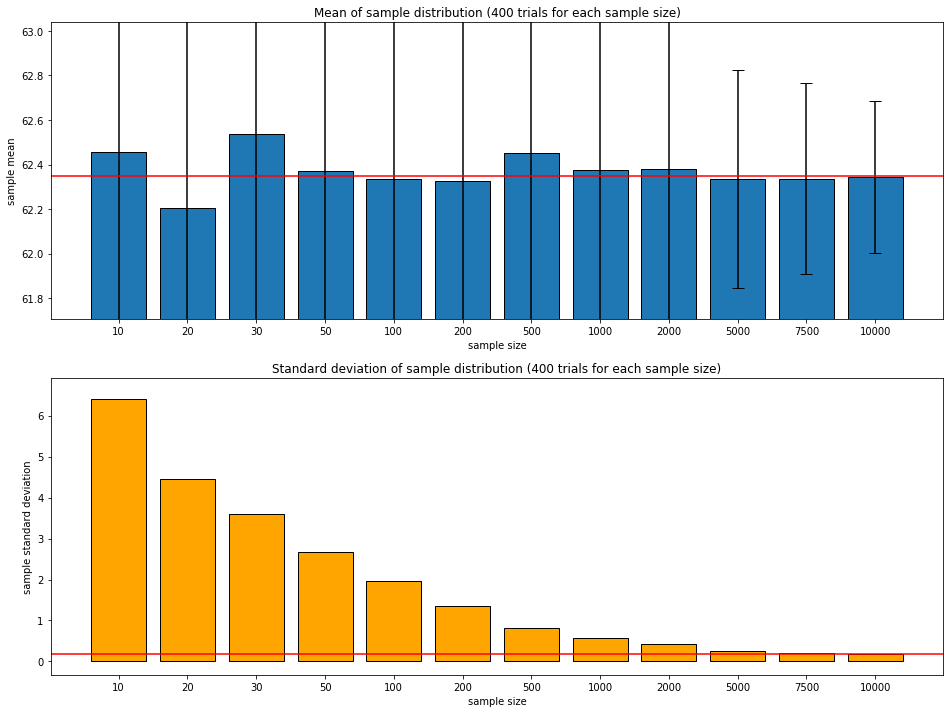

In [108]:
plot_mean_std(400, confidence=0.95)

# Confidence Explaination

This function shows a horizontal bar plot, where each bar's x-values represents the mean of a sample, and the confidence intervals are drawn too. If the mean of a sample falls out of the confidence interval, the bar is plotted in red, otherwise it is plotted in blue.

In [204]:
def plot_mean_fixed(iterations, sample_size, confidence=0.95, plot=False):
    
    true_mean = df["Temperature(F)"].mean()
    true_std = df["Temperature(F)"].std()
    means = []
    std_devs = []
    conf_int_width = [] #actually it is width/2
       
    for i in range(iterations):     
        sample = df["Temperature(F)"] .sample(sample_size, replace=False)  
        h = (true_std/np.sqrt(sample_size)) * t.ppf((1-confidence) / 2, sample_size - 1)
        
        means.append(sample.mean())
        conf_int_width.append(h)
    
    condition = (np.array(np.array(means)-np.array(conf_int_width)<= true_mean)) | \
                (np.array(true_mean <= np.array(means)+np.array(conf_int_width)))
    
    print("wrong: ", np.sum(condition))
    print("wrong percentage: ", np.sum(condition)/iterations)
        
    if plot == True:
        fig, ax = plt.subplots(1,1, figsize=(14,14))
        
        color = ["salmon" if condition[i] else "lightblue" for i in range(len(means)) ]

        ax.barh([str(i) for i in range(len(means))], means, edgecolor="black", 
               xerr=conf_int_width, color=color, capsize=6)

        ax.set_xlim((np.min(means)-0.2,np.max(means)+0.2))

        ax.axvline(true_mean, color="navy", linewidth=2)

        ax.set_xlabel("sample mean")
        ax.set_ylabel("trial number")
        ax.set_title(f"Mean of sample distribution (sample size = {sample_size})")

        plt.show()
    
    return means,std_devs, conf_int_width

As the definition of confidence interval suggests, we should find a wrong percentage of **1-confidence**, when the parameter **iterations** is large.

Remember that:

- A 95% confidence level does not mean that for a given realized interval there is a 95% probability that the population parameter lies within the interval (i.e., a 95% probability that the interval covers the population parameter). According to the strict frequentist interpretation, once an interval is calculated, this interval either covers the parameter value or it does not; it is no longer a matter of probability because the parameter is an unknown constant, and no probability statement concerning its value may be made.

wrong:  5
wrong percentage:  0.05


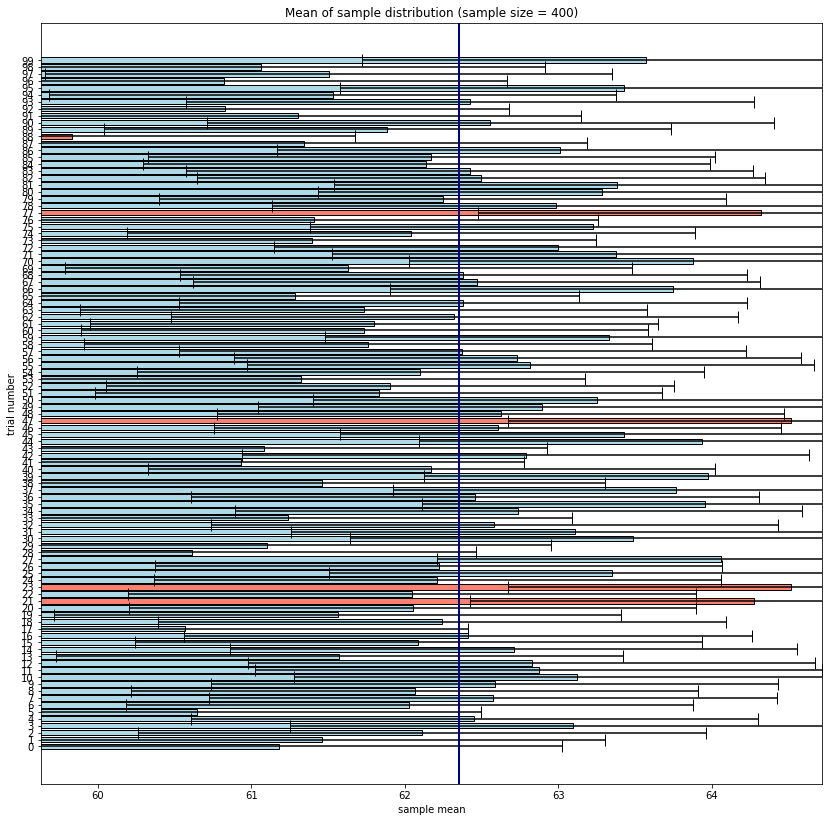

In [227]:
m,s,c = plot_mean_fixed(iterations=100, sample_size=400, confidence=0.95, plot=True)